In [ ]:
# Building Classification Algorithm for Customer either leave the bank or not.
# Need to find the optimal machine learning classification algorithm.

In [42]:
# Load Dataset using pandas

import pandas as pd
dataset=pd.read_csv('Customer Bank Data.csv')

In [43]:
# Understanding the data by descriptive statstical methods
print("------------------------head statistical method----------------------")
print(dataset.head(4))
print("------------------------ Descriptive statistical methods--------------")
print(dataset.describe())
print("------------------------- Shape Statistical method--------------------")
print(dataset.shape)
print("------------------------ Datatype of each attribute statistical method-------------------")
print(dataset.dtypes)

------------------------head statistical method----------------------
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
------------------------ Descriptive statistical methods--------------
         Row

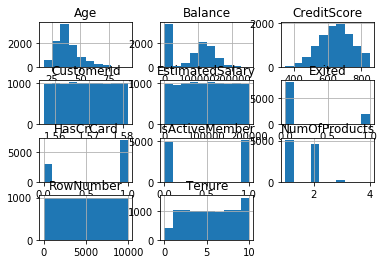

In [44]:
# By using visualisation understanding each attribute statistical distributions.

import matplotlib.pyplot as plt
# Histogram statistical plot.
dataset.hist()
plt.show()

In [45]:
# With above histogram plot we didnt get smooth graph and with histogram plot we are not sure,
# Each attribute belongs to which distribution

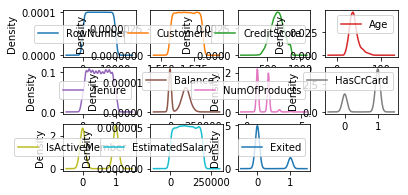

In [46]:
# Density statistical plot visualisation.
dataset.plot(kind='density',layout=(4,4),sharex=False,sharey=False,subplots=True)
plt.show()

In [47]:
# With Density plot it is clear that we have Uniform distribution,binomial distribution,exponetial
# and normal distributions.

In [48]:
# Splitting the dataset into input and output attributes
x=dataset.iloc[:,3:-1].values
y=dataset.iloc[:,-1].values
print(x[:2,:])
print(y[:2,])

[[619L 'France' 'Female' 42L 2L 0.0 1L 1L 1L 101348.88]
 [608L 'Spain' 'Female' 41L 1L 83807.86 1L 0L 1L 112542.58]]
[1 0]


In [49]:
# Data cleaning the input attribute to encode the categorical value into numerical values

from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
labelencoder_x=LabelEncoder()
x[:,1]=labelencoder.fit_transform(x[:,1])
x[:,2]=labelencoder_x.fit_transform(x[:,2])
print(x[:3,:])

[[619L 0 0 42L 2L 0.0 1L 1L 1L 101348.88]
 [608L 2 0 41L 1L 83807.86 1L 0L 1L 112542.58]
 [502L 0 0 42L 8L 159660.8 3L 1L 0L 113931.57]]


In [50]:
# Encoding country column from numerical values into dummy varaible

from sklearn.preprocessing import OneHotEncoder
onehotencoder=OneHotEncoder(categorical_features=[1])
x=onehotencoder.fit_transform(x).toarray()
print(x[:3,:])

[[1.0000000e+00 0.0000000e+00 0.0000000e+00 6.1900000e+02 0.0000000e+00
  4.2000000e+01 2.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 6.0800000e+02 0.0000000e+00
  4.1000000e+01 1.0000000e+00 8.3807860e+04 1.0000000e+00 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 5.0200000e+02 0.0000000e+00
  4.2000000e+01 8.0000000e+00 1.5966080e+05 3.0000000e+00 1.0000000e+00
  0.0000000e+00 1.1393157e+05]]


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [51]:
# Handing dummy variable (d2=1-d1) using statistical formula
x=x[:,1:]
print(x[:2,:])

[[0.0000000e+00 0.0000000e+00 6.1900000e+02 0.0000000e+00 4.2000000e+01
  2.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
  1.0134888e+05]
 [0.0000000e+00 1.0000000e+00 6.0800000e+02 0.0000000e+00 4.1000000e+01
  1.0000000e+00 8.3807860e+04 1.0000000e+00 0.0000000e+00 1.0000000e+00
  1.1254258e+05]]


In [52]:
# Splitting the dataset into training and test set resample method.

seed=5
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,test_size=0.2,random_state=seed)
print(x_train[:2,:])
print(x_test[:2,:])
print(y_train[:2,])
print(y_test[:2,])

[[0.0000000e+00 1.0000000e+00 7.5000000e+02 0.0000000e+00 3.9000000e+01
  6.0000000e+00 0.0000000e+00 2.0000000e+00 0.0000000e+00 0.0000000e+00
  1.9264330e+04]
 [0.0000000e+00 0.0000000e+00 7.2600000e+02 1.0000000e+00 3.4000000e+01
  3.0000000e+00 0.0000000e+00 2.0000000e+00 1.0000000e+00 0.0000000e+00
  1.9628846e+05]]
[[0.0000000e+00 1.0000000e+00 7.6900000e+02 1.0000000e+00 3.8000000e+01
  6.0000000e+00 0.0000000e+00 2.0000000e+00 0.0000000e+00 0.0000000e+00
  1.0439378e+05]
 [0.0000000e+00 0.0000000e+00 5.3400000e+02 0.0000000e+00 3.4000000e+01
  7.0000000e+00 1.2155158e+05 2.0000000e+00 1.0000000e+00 1.0000000e+00
  7.0179000e+04]]
[0 0]
[0 0]


In [57]:
# Spot check and compare the classification algorithms without feature scale

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


neighbors=3
trees=10

logistic_regression=LogisticRegression()
naive_bayes=GaussianNB()
knn=KNeighborsClassifier(n_neighbors=neighbors)
svc=SVC()
decisiontree=DecisionTreeClassifier()
randomforest=RandomForestClassifier(n_estimators=trees)

# Fitting training dataset in each classification algorithm
logistic_regression.fit(x_train,y_train)
naive_bayes.fit(x_train,y_train)
knn.fit(x_train,y_train)
svc.fit(x_train,y_train)
decisiontree.fit(x_train,y_train)
randomforest.fit(x_train,y_train)

# Predicting Accuracy of an algorithms from test or unseen dataset.
y_logistic_regression=logistic_regression.predict(x_test)
y_naive_bayes=naive_bayes.predict(x_test)
y_knn=knn.predict(x_test)
y_svc=svc.predict(x_test)
y_decisiontree=decisiontree.predict(x_test)
y_randomforest=randomforest.predict(x_test)


# Confusion metrics statistical method to find classification accuracy.

from sklearn.metrics import confusion_matrix
confusion_LogisticRegression_Accuracy=confusion_matrix(y_test,logistic_regression.predict(x_test))
confusion_NaiveBayes_Accuracy=confusion_matrix(y_test,naive_bayes.predict(x_test))
confusion_KNN_Accuracy=confusion_matrix(y_test,knn.predict(x_test))
confusion_SVM_Accuracy=confusion_matrix(y_test,svc.predict(x_test))
confusion_DecisionTree_Accuracy=confusion_matrix(y_test,decisiontree.predict(x_test))
confusion_RandomForest_Accuracy=confusion_matrix(y_test,randomforest.predict(x_test))

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [59]:
print("----------------LogisticRegression-----------------")
print(confusion_LogisticRegression_Accuracy)
print("---------------Naive Bayes--------------------------")
print(confusion_NaiveBayes_Accuracy)
print("-------------- KNN----------------------------------")
print(confusion_KNN_Accuracy)
print("--------------- Support Vector Machine--------------")
print(confusion_SVM_Accuracy)
print("----------------Decision Tree-----------------------")
print(confusion_DecisionTree_Accuracy)
print("---------------- Random Forest----------------------")
print(confusion_RandomForest_Accuracy)

----------------LogisticRegression-----------------
[[1567   28]
 [ 388   17]]
---------------Naive Bayes--------------------------
[[1542   53]
 [ 380   25]]
-------------- KNN----------------------------------
[[1428  167]
 [ 348   57]]
--------------- Support Vector Machine--------------
[[1595    0]
 [ 405    0]]
----------------Decision Tree-----------------------
[[1367  228]
 [ 193  212]]
---------------- Random Forest----------------------
[[1520   75]
 [ 231  174]]


In [60]:
# Spot check and compare the classification algorithms with feature scale

from sklearn.preprocessing import Normalizer
scale=Normalizer()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)



logistic_regression=LogisticRegression()
naive_bayes=GaussianNB()
knn=KNeighborsClassifier(n_neighbors=neighbors)
svc=SVC()
decisiontree=DecisionTreeClassifier()
randomforest=RandomForestClassifier(n_estimators=trees)

# Fitting training dataset in each classification algorithm
logistic_regression.fit(x_train,y_train)
naive_bayes.fit(x_train,y_train)
knn.fit(x_train,y_train)
svc.fit(x_train,y_train)
decisiontree.fit(x_train,y_train)
randomforest.fit(x_train,y_train)

# Predicting Accuracy of an algorithms from test or unseen dataset.
y_logistic_regression=logistic_regression.predict(x_test)
y_naive_bayes=naive_bayes.predict(x_test)
y_knn=knn.predict(x_test)
y_svc=svc.predict(x_test)
y_decisiontree=decisiontree.predict(x_test)
y_randomforest=randomforest.predict(x_test)


# Confusion metrics statistical method to find classification accuracy.

confusion_LogisticRegression_Accuracy=confusion_matrix(y_test,logistic_regression.predict(x_test))
confusion_NaiveBayes_Accuracy=confusion_matrix(y_test,naive_bayes.predict(x_test))
confusion_KNN_Accuracy=confusion_matrix(y_test,knn.predict(x_test))
confusion_SVM_Accuracy=confusion_matrix(y_test,svc.predict(x_test))
confusion_DecisionTree_Accuracy=confusion_matrix(y_test,decisiontree.predict(x_test))
confusion_RandomForest_Accuracy=confusion_matrix(y_test,randomforest.predict(x_test))

In [61]:
# Scaled Algorithm Accuracy
print("----------------LogisticRegression-----------------")
print(confusion_LogisticRegression_Accuracy)
print("---------------Naive Bayes--------------------------")
print(confusion_NaiveBayes_Accuracy)
print("-------------- KNN----------------------------------")
print(confusion_KNN_Accuracy)
print("--------------- Support Vector Machine--------------")
print(confusion_SVM_Accuracy)
print("----------------Decision Tree-----------------------")
print(confusion_DecisionTree_Accuracy)
print("---------------- Random Forest----------------------")
print(confusion_RandomForest_Accuracy)

----------------LogisticRegression-----------------
[[1595    0]
 [ 405    0]]
---------------Naive Bayes--------------------------
[[  94 1501]
 [  10  395]]
-------------- KNN----------------------------------
[[1420  175]
 [ 347   58]]
--------------- Support Vector Machine--------------
[[1595    0]
 [ 405    0]]
----------------Decision Tree-----------------------
[[1359  236]
 [ 216  189]]
---------------- Random Forest----------------------
[[1531   64]
 [ 284  121]]


In [62]:
# As per above confusion matrix accuracy Random forest, decision tree and KNN occupied top 3 algorithms for this dataset.
# Now we are going to tune the RandomForest and KNN to find best "HyperParameter"


In [65]:
# Tuning the Decision Tree and KNN Algorithm to imporve performance by using hyperparameter.

# Tuning The Random Forest Algorithm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

randomforest=RandomForestClassifier()
kfold=KFold(n_splits=10,random_state=seed)


estimators=[3,6,9,12,15,18,21,24,27,30]
params=dict(n_estimators=estimators)
result=GridSearchCV(estimator=randomforest,param_grid=params,cv=kfold,scoring='accuracy')
grid_result=result.fit(x_train,y_train)
print(grid_result.best_score_,grid_result.best_params_)

(0.83875, {'n_estimators': 30})


In [67]:
# Tuning The KNN Algorithm

knn=KNeighborsClassifier()
kfold=KFold(n_splits=10,random_state=seed)
neighbors=[2,4,6,8,10,12,13,14,16,17,19,20]
params=dict(n_neighbors=neighbors)

result=GridSearchCV(estimator=knn,param_grid=params,cv=kfold,scoring='accuracy')
grid_result=result.fit(x_train,y_train)

print("Best KNN:",grid_result.best_score_,grid_result.best_params_)

('Best KNN:', 0.7955, {'n_neighbors': 20})


In [68]:
# We got 83.875% accuracy for Random forest classifier with 30 decision trees and
# We got 79.55% accuracy for KNN algorithm with 20 neighbors.
# Finally we are using Random Forest with 30 decision trees to train our model and test as well.

In [70]:
# Random Forest Classifier Algorithm For Bank customer dataset.
from sklearn.metrics import accuracy_score

# training Random Forest
randomforest=RandomForestClassifier(n_estimators=30)
randomforest.fit(x_train,y_train)

# Predicting accuracy of an algorithm
y_pred=randomforest.predict(x_test)

# accuracy
print("Accuracy score : ",accuracy_score(y_test,y_pred))
print("Accuracy Matrix : ",confusion_matrix(y_test,y_pred))

('Accuracy score : ', 0.8375)
('Accuracy Matrix : ', array([[1537,   58],
       [ 267,  138]], dtype=int64))


In [ ]:
# Perfect we got 83.75% accuracy for test set our random forest model not under and overfit with our training set